# Frequency dependence of the dielectric constant
In this notebook we will explore the frequency dependence of the dielectric constant by considering a simple model for a system with multipl characteristic response frequencies. Remember that we see a dependence of the dielectric constant on frequency becasue there are several different microscopic mechanisms of polarisation that that contribute. These different mechanisms involve different changes at the atomic scale: the rapid motion of electrons, the somewhat slower displacement of ions or the slower still reorientation of polar molecules.

![title](Figures/FrequencyDependence.png)

### A simple model

We will model each mechanism of polarisation as a driven damped oscillator: imagine a mass on a spring, with the mass sitting in a viscous fluid. We drive the oscillating mass by moving the opposite end of the spring at a particular frequency. The equation of motion of such an oscillator is:
$$
m\frac{\mathrm{d}^2 x(t)}{\mathrm{d} t^2} = -k\,x(t) - \beta\frac{\mathrm{d} x(t)}{\mathrm{d} t} + F(t).
$$
Here, $x(t)$ gives the displacement of the mass from its equilibrium position as a function of time, $k$ is the spring constant of the spring, $\beta$ is the damping constant of the viscous medium as $F(t)$ is the driving force. We now divide through by the mass of the oscillator, $m$, so that we have fewer constant to keep track of
$$
\frac{\mathrm{d}^2 x(t)}{\mathrm{d} t^2} = -\frac{k}{m}\,x(t) - \frac{\beta}{m}\frac{\mathrm{d} x(t)}{\mathrm{d} t} + f(t),
$$
where we define $f(t) = F(t)/m$.

### Implementing the model
Now we will implement a model of three driven damped oscillators, each with a different value for the spring and damping constants. We will then drive them at a range of different frequencies and record their long term steady state amplitudes. First we will import the usual useful functionality.

In [43]:
from __future__ import division
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

We implement the driving force $f(t)$ in a function. `w` is the angular frequency of the force:

In [44]:
def f(w,t):
    return 1.0*np.cos(w*t)

In [45]:
# Use arrays to store the constants associated with the three oscillators
km = np.array([36.0,256.0,625.0]) # Values of k/m
bm = np.array([0.02,0.02,0.02])   # Values of beta/m

# Set up an array of angular frequencies to drive at
nw =401
w = linspace(0.0,40.0,nw)

# Set up an array to record the steady state amplitude
amp = np.zeros((nw,3))

# Set up some simulation parameters
dt = 0.01  # Size of each timestep
n = 1000   # Number of steps to run each oscillator for at each frequency
nr = 500   # Timestep to begin recording steady state amplitude
x = np.zeros(n+1) # Array to hold positions of oscillator
v = np.zeros(n+1) # Array to hold velocities of oscillator



# Set up initial conditions: Stationary oscillator at equilibrium position
x[0] = 0.0
v[0] = 0.0

for j in range(nw): # Loop over the range of driving frequencies
    for i in range(3): # For each freq, loop over the values of the constants for the three oscillators 
        for s in range(1,n+1): # For each oscillator at each freq, calculate the motion for n timesteps
            # The following lines implement the evolution of the position of the oscillator
            # using a common algorithm called the velocity-verlet scheme. You will meet it again in 
            # your 3rd year.
            t0 = (s-1)*dt
            a = -km[i]*x[s-1] - bm[i]*v[s-1] + f(w[j],t0)
            v2 = v[s-1] + 0.5*a*dt
            #print(a)
            x[s] = x[s-1] + v2*dt
            a = -km[i]*x[s] - bm[i]*v[s-1] + f(w[j],t0)
            v[s] = v2 + 0.5*a*dt
            # The code below records the steady state amplitude of the oscillator
            # for the ith set of parameters at the jth frequency
            if x[s] > amp[j,i] and s > nr:
                amp[j,i] = x[s]

First of all we plot the amplitudes of the three oscillators separately:

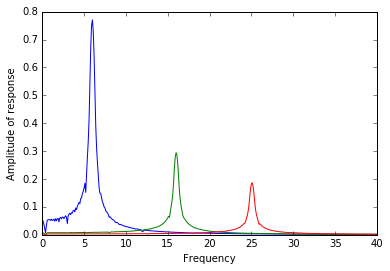

In [46]:
# Array of time values for plotting
tvals = linspace(0.0,n,n+1)
tvals = tvals*dt

plt.xlabel('Frequency')
plt.ylabel('Amplitude of response')
plt.plot(w,amp[:,0])
plt.plot(w,amp[:,1])
plt.plot(w,amp[:,2])

The combined response of the system is just the sum of the three individual responses:

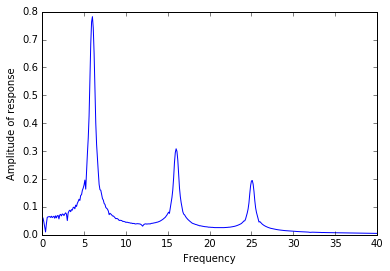

In [47]:
plt.xlabel('Frequency')
plt.ylabel('Amplitude of response')
plot(w,amp[:,0]+amp[:,1]+amp[:,2])

We can perhaps get a clearer view if we scale the axes a little:

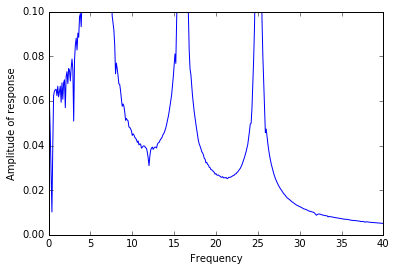

In [51]:
plt.axis([0, 40, 0.0, 0.1])
plt.xlabel('Frequency')
plt.ylabel('Amplitude of response')
plot(w,amp[:,0]+amp[:,1]+amp[:,2])

Compare this with our schematic at the top of the notebook. There are some clear similarities. The stepped nature of the response as the three mechanisms gradually become inoperable with increasing frequency is just about visible. We can also see the effects of resonance: large spikes when the driving frequency matches the natureal frequency of one of the oscillators. These resonances are much more dramatic in our simple model system.